In [0]:
import numpy as np
import matplotlib.pyplot as plt

n_samples=100000

if 0:
  mean1 = [0, 0]
  mean2 = [1, 0]
  mean3 = [0, 1]
  mean4 = [1, 1]
  cov = [[0.04, 0], [0, 0.04]]  # diagonal covariance
  data1 = np.random.multivariate_normal(mean1, cov, nn)
  data2 = np.random.multivariate_normal(mean2, cov, nn)
  data3 = np.random.multivariate_normal(mean3, cov, nn)
  data4 = np.random.multivariate_normal(mean4, cov, nn)
  data = np.vstack([data1,data2,data3,data4])
  target = [i//(n_samples//4) for i in range(N)]    #list comprehension
else:
  from sklearn.datasets import make_blobs
  data, target = make_blobs(n_samples=n_samples, n_features=2, centers=[[0,0], [0,1], [1,0], [1,1]], cluster_std=0.2, random_state=1)

d = data.shape[1]
#y = bias(w0*x0) + (w1 * x1) + (w2 * x2)
train_x = np.insert(data, 0, 1, axis=1);
train_y = np.asarray(target)
train_y=(train_y>=1)+0

eta=0.5
import math
def sigmoid(x):
  return 1 / (1 + math.exp(-x))

rng = np.random.RandomState(1)
w = rng.randn(1, d+1)/100

for epoch in range(100):
  numcorr=0
  dw=np.zeros(w.shape)
  for t in range(n_samples):
    r=train_y[t]
    x=train_x[t,:]
    y=sigmoid(np.dot(x,w.T))
    if (y>0.5 and r==1) or (y<=0.5 and r==0) :
      numcorr=numcorr+1
    delta=r-y
    dw=dw+x*delta
  w=w+eta*dw/n_samples
print(numcorr)  


94942


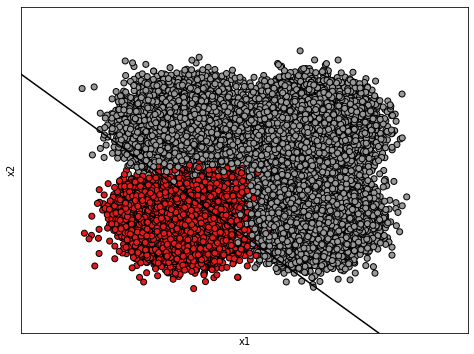

In [0]:
x_min, x_max = data[:, 0].min() - .5, data[:, 0].max() + .5
y_min, y_max = data[:, 1].min() - .5, data[:, 1].max() + .5

plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the training points
plt.scatter(data[:, 0], data[:, 1], c=train_y, cmap=plt.cm.Set1, edgecolor='k')
plt.xlabel('x1')
plt.ylabel('x2')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

xx = np.linspace(-5, 5)
yy=  (-w[0,0]-xx*w[0,1])/w[0,2]
plt.plot(xx, yy, 'k-')